In [1]:
def display_file(filename):
    text_file = open(filename)
    file_content = text_file.read()
    print(file_content)
    text_file.close()

# <center> KPFPipeline Overview </center>

<font size="4">

* A mechanism conforms to the Pipeline definitions of the W.M. Keck Observatories’ Keck Data Reduction Pipeline Framework (KeckDRPFramework).  
* The operation of mechansism is through the use of ‘recipe’ and 'config'.
* In the Framework, the focus is to enqueue and run a sequence of data reduction “primitives”. 
* The Framework accomplishes this through event queues and the event_table. 
* Event table provides a mechanism to map a primitive definition into actual python class in a module. </font>

</font>    
https://california-planet-search-kpf-pipeline.readthedocs-hosted.com/en/latest/api/pipeline/kpfpipe.html


## - Implementation in KPFPipeline

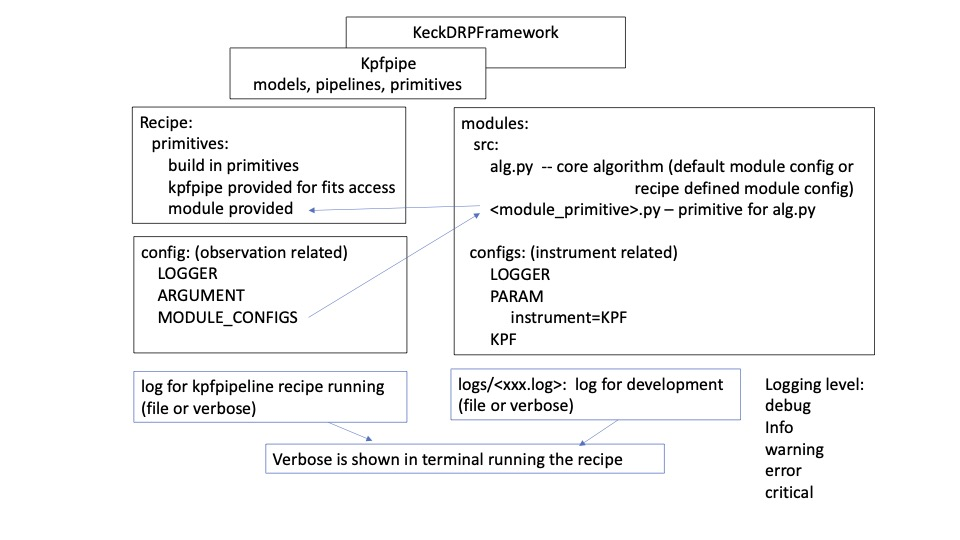

<font size="4"> 
* The recipe and config files are two mandatory files to run the Data Reduction Pipeline. 
* Modules provide the primitives for the recipe to perform the functions on data reduction or data processing. 
</font>


## - Recipe

<font size="3">  
* The recipe language has its own syntax/symantics and a parser is built in kpfpipe to parse the recipe.
* It is a subset of the grammar of Python programming language, but the recipe is not Python code. 
* The KPFPipeline parses the recipe file into a tree (Abstract Syntax Tree) and walk through the node (the syntax elements of the recipe) to complete the computation and the logic as expressed by the recipe code. 
* Primitives are the major elements in the recipe to do data reduction. It is implemented in Python class with the interface and methods predefined by kpfpipeline. 
</font>

## - Config

https://exoplanets.atlassian.net/wiki/spaces/shrek/pages/2541060127/KPF+config+handling


### -- examples of recipe and config

In [2]:
display_file('./kpf.cfg.notebook')

# Pipeline logger configurations
[LOGGER]
start_log = True
log_path = pipeline.log
log_level = info
log_verbose = True

[ARGUMENT]
data_type = KPF

##output_dir = /data/
##output_dir_flat = /data/
output_dir = ./test_data/data/kpf/
output_dir_flat = ./test_data/data/kpf/

#input_dir_root = /data/2D/
input_dir_root = ./test_data/data/kpf/2D/

# need to define the subdirectory to contain order trace result
output_trace = order_trace/
output_extraction = L1/
output_rv = L2/
output_rv_reweighting = reweighting/

# output_clip is no use when rectification_method = norect
output_clip = clip_np/
# need to define the subdirectory to contain barycorrection data and hk output
output_barycorr = bary/
output_hk = output_cahk/
output_lev1_suffix = _L1
output_lev2_suffix = _L2
ccd_list = ['GREEN_CCD', 'RED_CCD']

# for order trace
fitting_poly_degree = 3
ccd_idx = [0, 1]

# for spectral extraction, remember to update start_order & orderlet_names
orders_per_ccd=[35,32]

# need change based on 2D imag

In [3]:
display_file('./kpf.recipe.notebook')

from modules.order_trace.src.order_trace import OrderTrace
from modules.spectral_extraction.src.order_rectification import OrderRectification
from modules.spectral_extraction.src.spectral_extraction import SpectralExtraction
from modules.radial_velocity.src.radial_velocity_init import RadialVelocityInit
from modules.radial_velocity.src.radial_velocity import RadialVelocity
from modules.radial_velocity.src.radial_velocity_reweighting_ref import RadialVelocityReweightingRef
from modules.radial_velocity.src.radial_velocity_reweighting import RadialVelocityReweighting
from modules.Utils.string_proc import str_replace
from modules.Utils.string_proc import date_from_kpffile
from modules.Utils.data_handler import ExtCopy
from modules.Utils.data_handler import FromCSV
from modules.Utils.data_handler import GetHeaderValue
from modules.Utils.data_handler import SelectObs


sel_obsid = DATE_DIR
date_dir = DATE_DIR + '/'
flat_file_pattern = FLAT_FILE

#test_data_dir = KPFPIPE_TEST_DATA + '/'
test_

## - Primitives

<font size="4">
In general, there are 3 types of primitives to support the recipe:
    
* kpfpipeline provided primitives for writing and reading the fits. kpf0_from_fits, kpf1_from_fits, to_fits, etc. 
* kpfpipeline built-in primitives to support the execution of the recipe, like “start_recipe”, “resume_recipe”. 
* primitives for each module to handle data reduction or data processing. 
</font>

## <center>DRP Setup and Recipe Running on Shrek</center>


  
Two environment varaibles, KPFPIPE_DATA, KPFPIPE_TEST_DATA, are set in advance in order to transport two data directories used in docker container. 

|environment variable | data directory on Shrek | data directory in docker container | 
| :- | :- | :- |
|KPFPIPE_DATA | shrek:/data/kpf (for ops)  or        | /data
|             | &lt;directory with KPFPipeline clone&gt;/KPF-Pipeline/test_data/data/kpf (for dev)** | /data |
|KPFPIPE_TEST_DATA | shrek:/data/KPF-Pipeline-TestData            | /testdata |


**In order preserve the KPF data produced at shrek:/data/kpf/, for this event, I create a directory `test_data` under `KPF-Pipeline` to contain a small amount of fits input, 2D, and fits output, L1 & L2. The recipe/config files are real for the DRP on the real KPF data.   

The following commands can be used to construct Docker container and run the recipe/config to produce L1 and L2 data from KPF 2D data on Shrek:    

| command | notes |
| :-     | :-   |
| export KPFPIPE_TEST_DATA=/data/KPF-Pipeline-TestData  | # used for makefile |
| export KPFPIPE_DATA=&lt;path with KPF-Pipeline clone&gt;/KPF-Pipeline/test_data/data/kpf  | |
| cd &lt;the sub-directory with KPF-Pipeline &gt;  | |
|git clone https://github.com/California-Planet-Search/KPF-Pipeline.git |# from github|  
|cd KPF-Pipeline  | |
|git checkout feature/drp_fix_rv | # branch with the DRP recipe  |
|source drp_setup |# create sub-directory test_data/data/kpf to hold data |
|make docker | # set up docker container, Dockerfile, makefile| 
|make init | # set up kpfpipeline in the docker container  |  
|export DATE_DIR=20220517  |  # used in recipe  |
|export FLAT_FILE=KP.20220517.52876.04    | # used in recipe  | 

## <center> Run a simple recipe </center>

## - command:  
`kpf -r examples/simple.recipe -c examples/docs_simple.cfg`


##  - simple.recipe

In [4]:
display_file('./simple.recipe')

from modules.Utils.KPFM_Trivial import KPFModExample
result=KPFModExample()




## - docs_simple.cfg

In [5]:
display_file('./docs_simple.cfg')


# Pipeline logger configurations
[LOGGER]
start_log = True
log_path = logs/pipe_log.log
log_level = info
log_verbose = True

# for recipe 
[ARGUMENT]

[MODULE_CONFIGS]



## - KPFM_Trivial.py

In [6]:
display_file('./KPFM_Trivial.py')

"""
    The file contains primitive KPFModeExample

    Attributes:
       KPFModeExample: primitive for simmple recipe test


"""

from kpfpipe.primitives.core import KPF_Primitive

# External dependencies
from keckdrpframework.models.action import Action
from keckdrpframework.models.arguments import Arguments
from keckdrpframework.models.processing_context import ProcessingContext


class KPFModExample(KPF_Primitive):
    def __init__(self,
                 action: Action,
                 context: ProcessingContext) -> None:

        # Initialize parent class
        KPF_Primitive.__init__(self, action, context)

        self.logger = self.context.logger

    def _pre_condition(self) -> bool:
        """
        check if the extensions exist in the data model object
        """
        return True

    def _post_condition(self) -> bool:
        return True

    def _perform(self):
        result = 'KPFModeExample done'
        print('[{}] Performed!'.format(self.__class__.__name__))

## - logs in terminal

In [7]:
display_file('./logs_simple_docker.log')

******** in Docker container ******************
[KPF-Pipe][INFO]:Logger started
[KPF-Pipe][INFO]:Finished initializing Pipeline
[KPF-Pipe][INFO]:Module: subrecipe_depth = 0
[KPF-Pipe][INFO]:Added KPFModExample from modules.Utils.KPFM_Trivial to event_table
[KPF-Pipe][INFO]:Queued KPFModExample with args "name": KPFModExample_args; awaiting return.
[KPFModExample] Performed!
KPFModExample warning: done!
[KPF-Pipe][INFO]:Module: subrecipe_depth = 0
[KPF-Pipe][INFO]:Assign: result <- KPFModeExample done, type: str
[KPF-Pipe][INFO]:exiting pipeline...



## - logs/pipe_log.log

In [8]:
display_file('./pipe_log.log')

[KPF-Pipe][INFO]:Logger started
[KPF-Pipe][INFO]:Finished initializing Pipeline
[KPF-Pipe][INFO]:Module: subrecipe_depth = 0
[KPF-Pipe][INFO]:Added KPFModExample from modules.Utils.KPFM_Trivial to event_table
[KPF-Pipe][INFO]:Queued KPFModExample with args "name": KPFModExample_args; awaiting return.
[KPF-Pipe][INFO]:Module: subrecipe_depth = 0
[KPF-Pipe][INFO]:Assign: result <- KPFModeExample done, type: str
[KPF-Pipe][INFO]:exiting pipeline...



# <center>Overview of Modules </center>

## - Structure of KPFPipeline development

https://github.com/California-Planet-Search/KPF-Pipeline/tree/develop

<font size="4">
    
Two Major folders containing the Python cdes for KPF Pipeline: <br>
    
- kpfpipe:  data models,  basic pipeline primitives, pipeline recipe parser. 
- modules: flat fielding, order trace, bias subtraction, spectra extraction, radial velocity, barycentric correction, ca_hk, frame combine, overscan subtraction, etc. 
    
</font>

<font size="4">
    
The usage of other folders and files,
- docs: for KPFPipe documentation. <br> https://california-planet-search-kpf-pipeline.readthedocs-hosted.com/en/latest/. <br> Section of `Implemented Primitives` is releated to python docs from the source codes. 
- examples: recipe/config files. 
- logs:  log files, may come from log defined in recipe config or module config. 
  - recipe config -> LOGGER: ./pipeline.log,
  - modules config -> LOGGER: logs/xxxx.log
- tests: 
  - regression -> for CI testing.
  - validation,
  - performance, 
  - notebooks -> test files for jupyter notebooks, mainly for development test.
- Dockerfile, makefile 
    
</font>    

## - Structure and the codes in Modules


| modules | src | recipe primitive | 
| :-- | :-- | :-- |
| barycentric_correction | alg_barycentric_corr.py<br> barycentric_correction.py |<br> BarycentricCorrection |
| bias_subtraction|alg.py <br> bias_subtraction.py |<br>BiasSubtraction | 
|flat_fielding |alg.py <br> flat_fielding.py|<br> FlatFielding |
|order_trace|alg.py <br> order_tracce.py |<br>OrderTrace |  
|spectral_extraction| alg.py <br> order_rectification.py <br> spectral_extraction.py |<br>OrderRectification <br> SpectralExtraction|
|radial_velocity | alg_rv_init.py <br> alg.py <br> radial_velocity_init.py <br> radial_velocity.py <br> radial_velocity_reweighting_ref.py <br> radial_velocity_reweighting.py  |<br><br>RadialVelocityInit<br>RadialVelocity<br>RadialVelocityReweightingRef<br>RadialVelocityReweightingRef|
|ca_hk|alg.py <br> ca_hk_extraction.py | <br> CaHKExtraction | 
|Utils | data_handler.py <br> frame_combine.py <br> orientation_ref_reader.py <br> overscan_subtraction.py | ExtCpy, SelectObs <br>|

# <center> Running the recipe </center>

## - Order trace

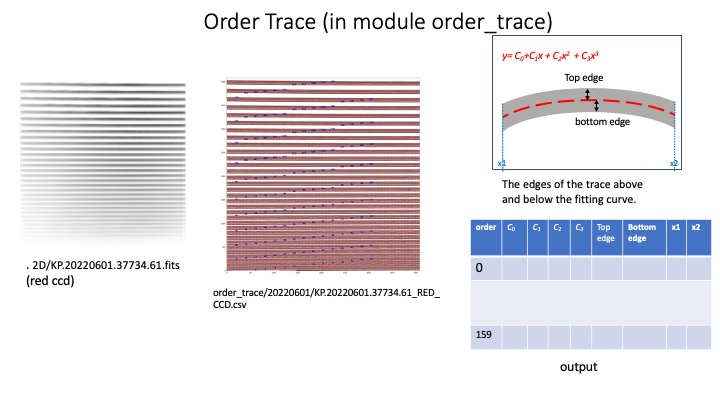

<font size="4">
    
**steps to run order trace:**

* change the following setting in examples/kpf_ait/kpf.cfg  
** do_order_trace = True  
** do_spectral_extraction=False  
** do_rv=False  
* kpf -r examples/kpf_ait/kpf.recipe -c examples/kpf_ait/kpf.cfg
</font>

<font size="4"> 
**Logs from order trace:** 
</font>

In [9]:
display_file("./log_order_trace.log")

root@2ecc8f8f5c82:/code/KPF-Pipeline# kpf -r examples/kpf_ait/kpf.recipe -c examples/kpf_ait/kpf.cfg
[KPF-Pipe][INFO]:Logger started
[KPF-Pipe][INFO]:Finished initializing Pipeline
[KPF-Pipe][INFO]:Module: subrecipe_depth = 0
[KPF-Pipe][INFO]:Added OrderTrace from modules.order_trace.src.order_trace to event_table
[KPF-Pipe][INFO]:Added OrderRectification from modules.spectral_extraction.src.order_rectification to event_table
[KPF-Pipe][INFO]:Added SpectralExtraction from modules.spectral_extraction.src.spectral_extraction to event_table
[KPF-Pipe][INFO]:Added RadialVelocityInit from modules.radial_velocity.src.radial_velocity_init to event_table
[KPF-Pipe][INFO]:Added RadialVelocity from modules.radial_velocity.src.radial_velocity to event_table
[KPF-Pipe][INFO]:Added RadialVelocityReweightingRef from modules.radial_velocity.src.radial_velocity_reweighting_ref to event_table
[KPF-Pipe][INFO]:Added RadialVelocityReweighting from modules.radial_velocity.src.radial_velocity_reweighting t

## - Spectral Extraction

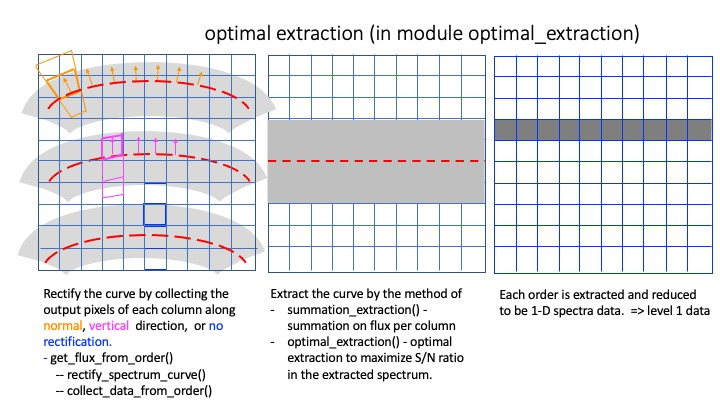

<font size="4">
    
**steps to run spectral extraction:**

* change the following setting in examples/kpf_ait/kpf.cfg  
** do_order_trace = True  
** do_spectral_extraction=True   
** do_rv=False
* kpf -r examples/kpf_ait/kpf.recipe -c examples/kpf_ait/kpf.cfg
</font>

<font size="4"> 
**Logs from spectral extraction:** 
</font>

In [10]:
display_file("./log_spectral_extraction.log")

root@2ecc8f8f5c82:/code/KPF-Pipeline# kpf -r examples/kpf_ait/kpf.recipe -c examples/kpf_ait/kpf.cfg
[KPF-Pipe][INFO]:Logger started
[KPF-Pipe][INFO]:Finished initializing Pipeline
[KPF-Pipe][INFO]:Module: subrecipe_depth = 0
[KPF-Pipe][INFO]:Added OrderTrace from modules.order_trace.src.order_trace to event_table
[KPF-Pipe][INFO]:Added OrderRectification from modules.spectral_extraction.src.order_rectification to event_table
[KPF-Pipe][INFO]:Added SpectralExtraction from modules.spectral_extraction.src.spectral_extraction to event_table
[KPF-Pipe][INFO]:Added RadialVelocityInit from modules.radial_velocity.src.radial_velocity_init to event_table
[KPF-Pipe][INFO]:Added RadialVelocity from modules.radial_velocity.src.radial_velocity to event_table
[KPF-Pipe][INFO]:Added RadialVelocityReweightingRef from modules.radial_velocity.src.radial_velocity_reweighting_ref to event_table
:
:
[KPF-Pipe][INFO]:If condition on recipe line 91 was True
[KPF-Pipe][INFO]:Assign: input_flat_file <- /data/

## - RVs from solar files

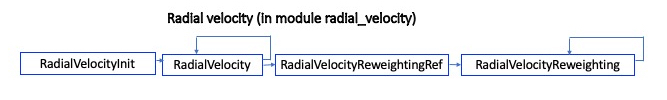

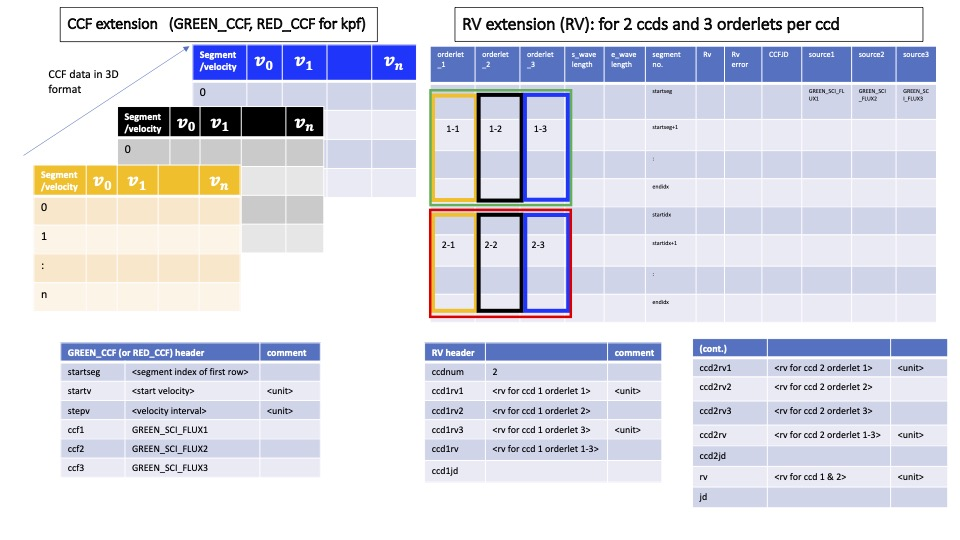

<font size="4">
    
**steps to run RV for solar files:**

* change the following setting in examples/kpf_ait/kpf.cfg  
** do_order_trace = True  
** do_spectral_extraction=True   
** do_rv=True 
* kpf -r examples/kpf_ait/kpf.recipe -c examples/kpf_ait/kpf.cfg
</font>

<font size="4"> 
**Logs from RVs:** 
</font>

In [11]:
display_file("./log_rv.log")

[KPF-Pipe][INFO]:Logger started
[KPF-Pipe][INFO]:Finished initializing Pipeline
[KPF-Pipe][INFO]:Module: subrecipe_depth = 0
[KPF-Pipe][INFO]:Added OrderTrace from modules.order_trace.src.order_trace to event_table
[KPF-Pipe][INFO]:Added OrderRectification from modules.spectral_extraction.src.order_rectification to event_table
[KPF-Pipe][INFO]:Added SpectralExtraction from modules.spectral_extraction.src.spectral_extraction to event_table
[KPF-Pipe][INFO]:Added RadialVelocityInit from modules.radial_velocity.src.radial_velocity_init to event_table
[KPF-Pipe][INFO]:Added RadialVelocity from modules.radial_velocity.src.radial_velocity to event_table
[KPF-Pipe][INFO]:Added RadialVelocityReweightingRef from modules.radial_velocity.src.radial_velocity_reweighting_ref to event_table
[KPF-Pipe][INFO]:Added RadialVelocityReweighting from modules.radial_velocity.src.radial_velocity_reweighting to event_table
[KPF-Pipe][INFO]:Added str_replace from modules.Utils.string_proc to event_table
[KPF-P

## check date content at directory 'test_data'

`ls -R test_data`